# TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import numpy as np 

from sklearn.metrics import accuracy_score, f1_score,confusion_matrix , plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


In [16]:
data = pd.read_csv('classification_dataset.csv')
data

,Unnamed: 0,programme,age,students_in_room,stress_level,sports_per_week,bed_time,good_day_(1)_0,good_day_(1)_1,good_day_(1)_2,...,good_day_(1)_4,good_day_(1)_5,good_day_(1)_6,good_day_(2)_0,good_day_(2)_1,good_day_(2)_2,good_day_(2)_3,good_day_(2)_4,good_day_(2)_5,good_day_(2)_6
0,0,AI,0.142857,0.079402,0.5,0.018868,0.187630,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,AI,0.238095,0.331415,1.0,0.000000,0.979847,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,AI,0.238095,0.654776,0.6,0.037736,0.958999,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3,AI,0.238095,0.217491,0.2,0.094340,0.979847,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,Data Mining,0.285714,0.079402,0.5,0.094340,0.958999,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,300,CS,0.095238,0.194476,0.7,0.188679,0.041696,0,0,0,...,0,1,0,0,0,0,0,1,0,0
301,301,Exch,0.285714,0.424626,0.7,0.000000,0.047950,1,0,0,...,0,0,0,1,0,0,0,0,0,0
302,302,CS,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,...,0,0,0,1,0,0,0,0,0,0
303,303,AI,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 25, 'p': 2, 'weights': 'uniform'}
Accuracy score: 0.43426870748299323
Test set accuracy: 0.4426229508196721
Test set F1 score: 0.12899262899262898

Confidence Intervals:
Accuracy: [0.32786885 0.55737705]
F1 score: [0.10392614 0.22052578]


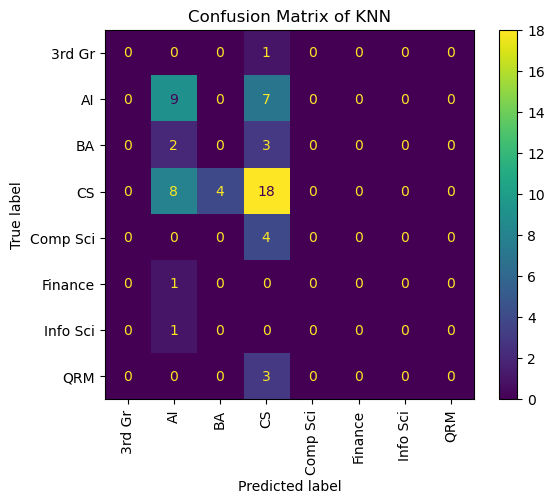

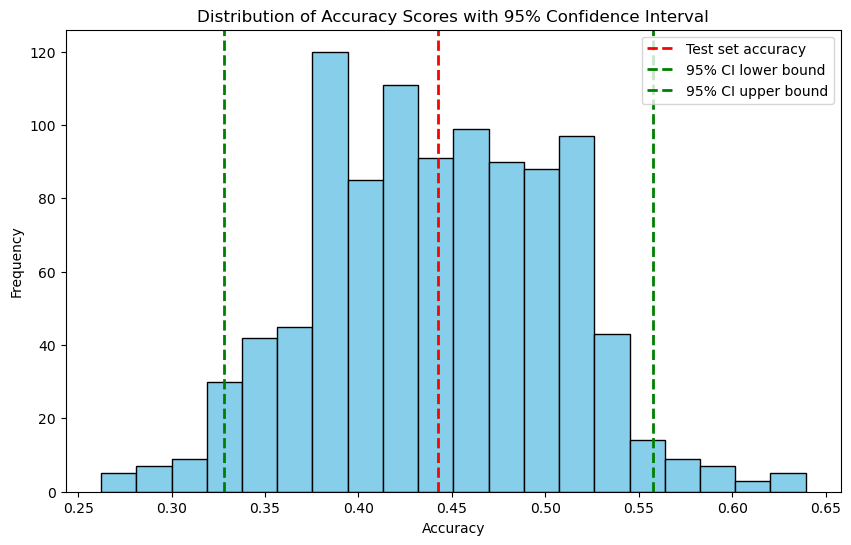

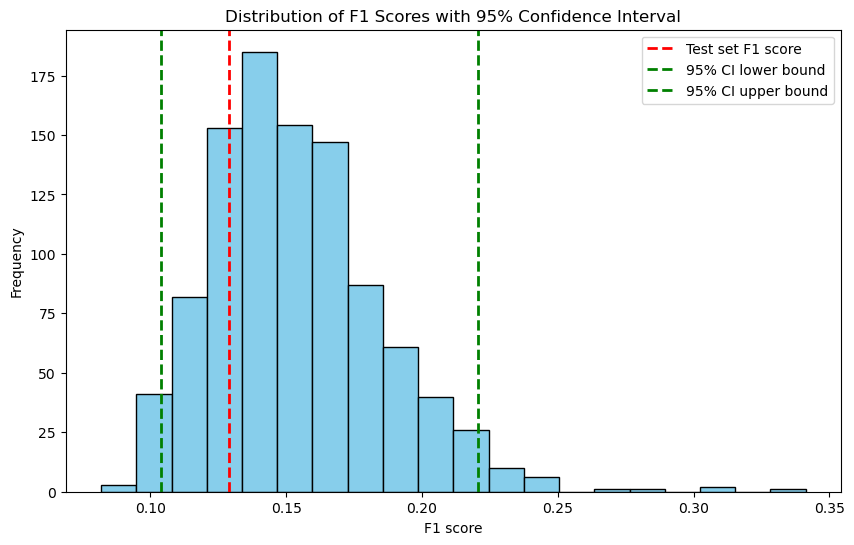

In [17]:
# Load the dataset
data = pd.read_csv('classification_dataset.csv')

# Check for missing values
data = data.dropna()

# Separate target variable and feature variables
target = data['programme']
data = data.drop(['programme','Unnamed: 0'], axis=1)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_neighbors': range(1, 31),  # number of neighbors to include in the majority of the voting process
    'weights': ['uniform', 'distance'],  # weight function to use in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm to use for nearest neighbors search
    'p': [1, 2],  # power parameter for Minkowski metric
}

# Create a KNN model
knn = KNeighborsClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)



# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of KNN")


# Calculate confidence intervals for accuracy and F1 score

# Accuracy
n_test = len(y_test)
accuracy_scores = []
for _ in range(1000):  # repeat 1000 times to get a distribution of accuracy scores
    indices = np.random.randint(0, len(y_test), n_test)
    y_pred = grid_search.predict(X_test.iloc[indices])
    accuracy_scores.append(accuracy_score(y_test.iloc[indices], y_pred))

accuracy_scores = np.array(accuracy_scores)
confidence_interval_acc = np.percentile(accuracy_scores, q=[2.5, 97.5]) # 95% confidence interval

# F1 score
f1_scores = []
for _ in range(1000): # repeat 1000 times to get a distribution of F1 scores
    indices = np.random.randint(0, len(y_test), n_test)
    y_pred = grid_search.predict(X_test.iloc[indices])
    f1_scores.append(f1_score(y_test.iloc[indices], y_pred, average='macro'))

f1_scores = np.array(f1_scores)
confidence_interval_f1 = np.percentile(f1_scores, q=[2.5, 97.5]) # 95% confidence interval

print("\nConfidence Intervals:")
print("Accuracy:", confidence_interval_acc)
print("F1 score:", confidence_interval_f1)

# Plot the distribution of accuracy scores
plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=accuracy, color='red', linestyle='dashed', linewidth=2, label='Test set accuracy')
plt.axvline(x=confidence_interval_acc[0], color='green', linestyle='dashed', linewidth=2, label='95% CI lower bound')
plt.axvline(x=confidence_interval_acc[1], color='green', linestyle='dashed', linewidth=2, label='95% CI upper bound')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores with 95% Confidence Interval')
plt.legend()
plt.show()

# Plot the distribution of F1 scores
plt.figure(figsize=(10, 6))
plt.hist(f1_scores, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=f1, color='red', linestyle='dashed', linewidth=2, label='Test set F1 score')
plt.axvline(x=confidence_interval_f1[0], color='green', linestyle='dashed', linewidth=2, label='95% CI lower bound')
plt.axvline(x=confidence_interval_f1[1], color='green', linestyle='dashed', linewidth=2, label='95% CI upper bound')
plt.xlabel('F1 score')
plt.ylabel('Frequency')
plt.title('Distribution of F1 Scores with 95% Confidence Interval')
plt.legend()
plt.show()



# Compute and print the confusion matrix as text
# cm = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:")
# print(cm)


# # Plot the confusion matrix with x-axis labels rotated vertically
# plt.figure(figsize=(10, 6))
# plt.title("Confusion Matrix of KNN")
# plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
# plt.xticks(rotation='vertical') # Rotate x-axis labels
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.colorbar()
# plt.show()


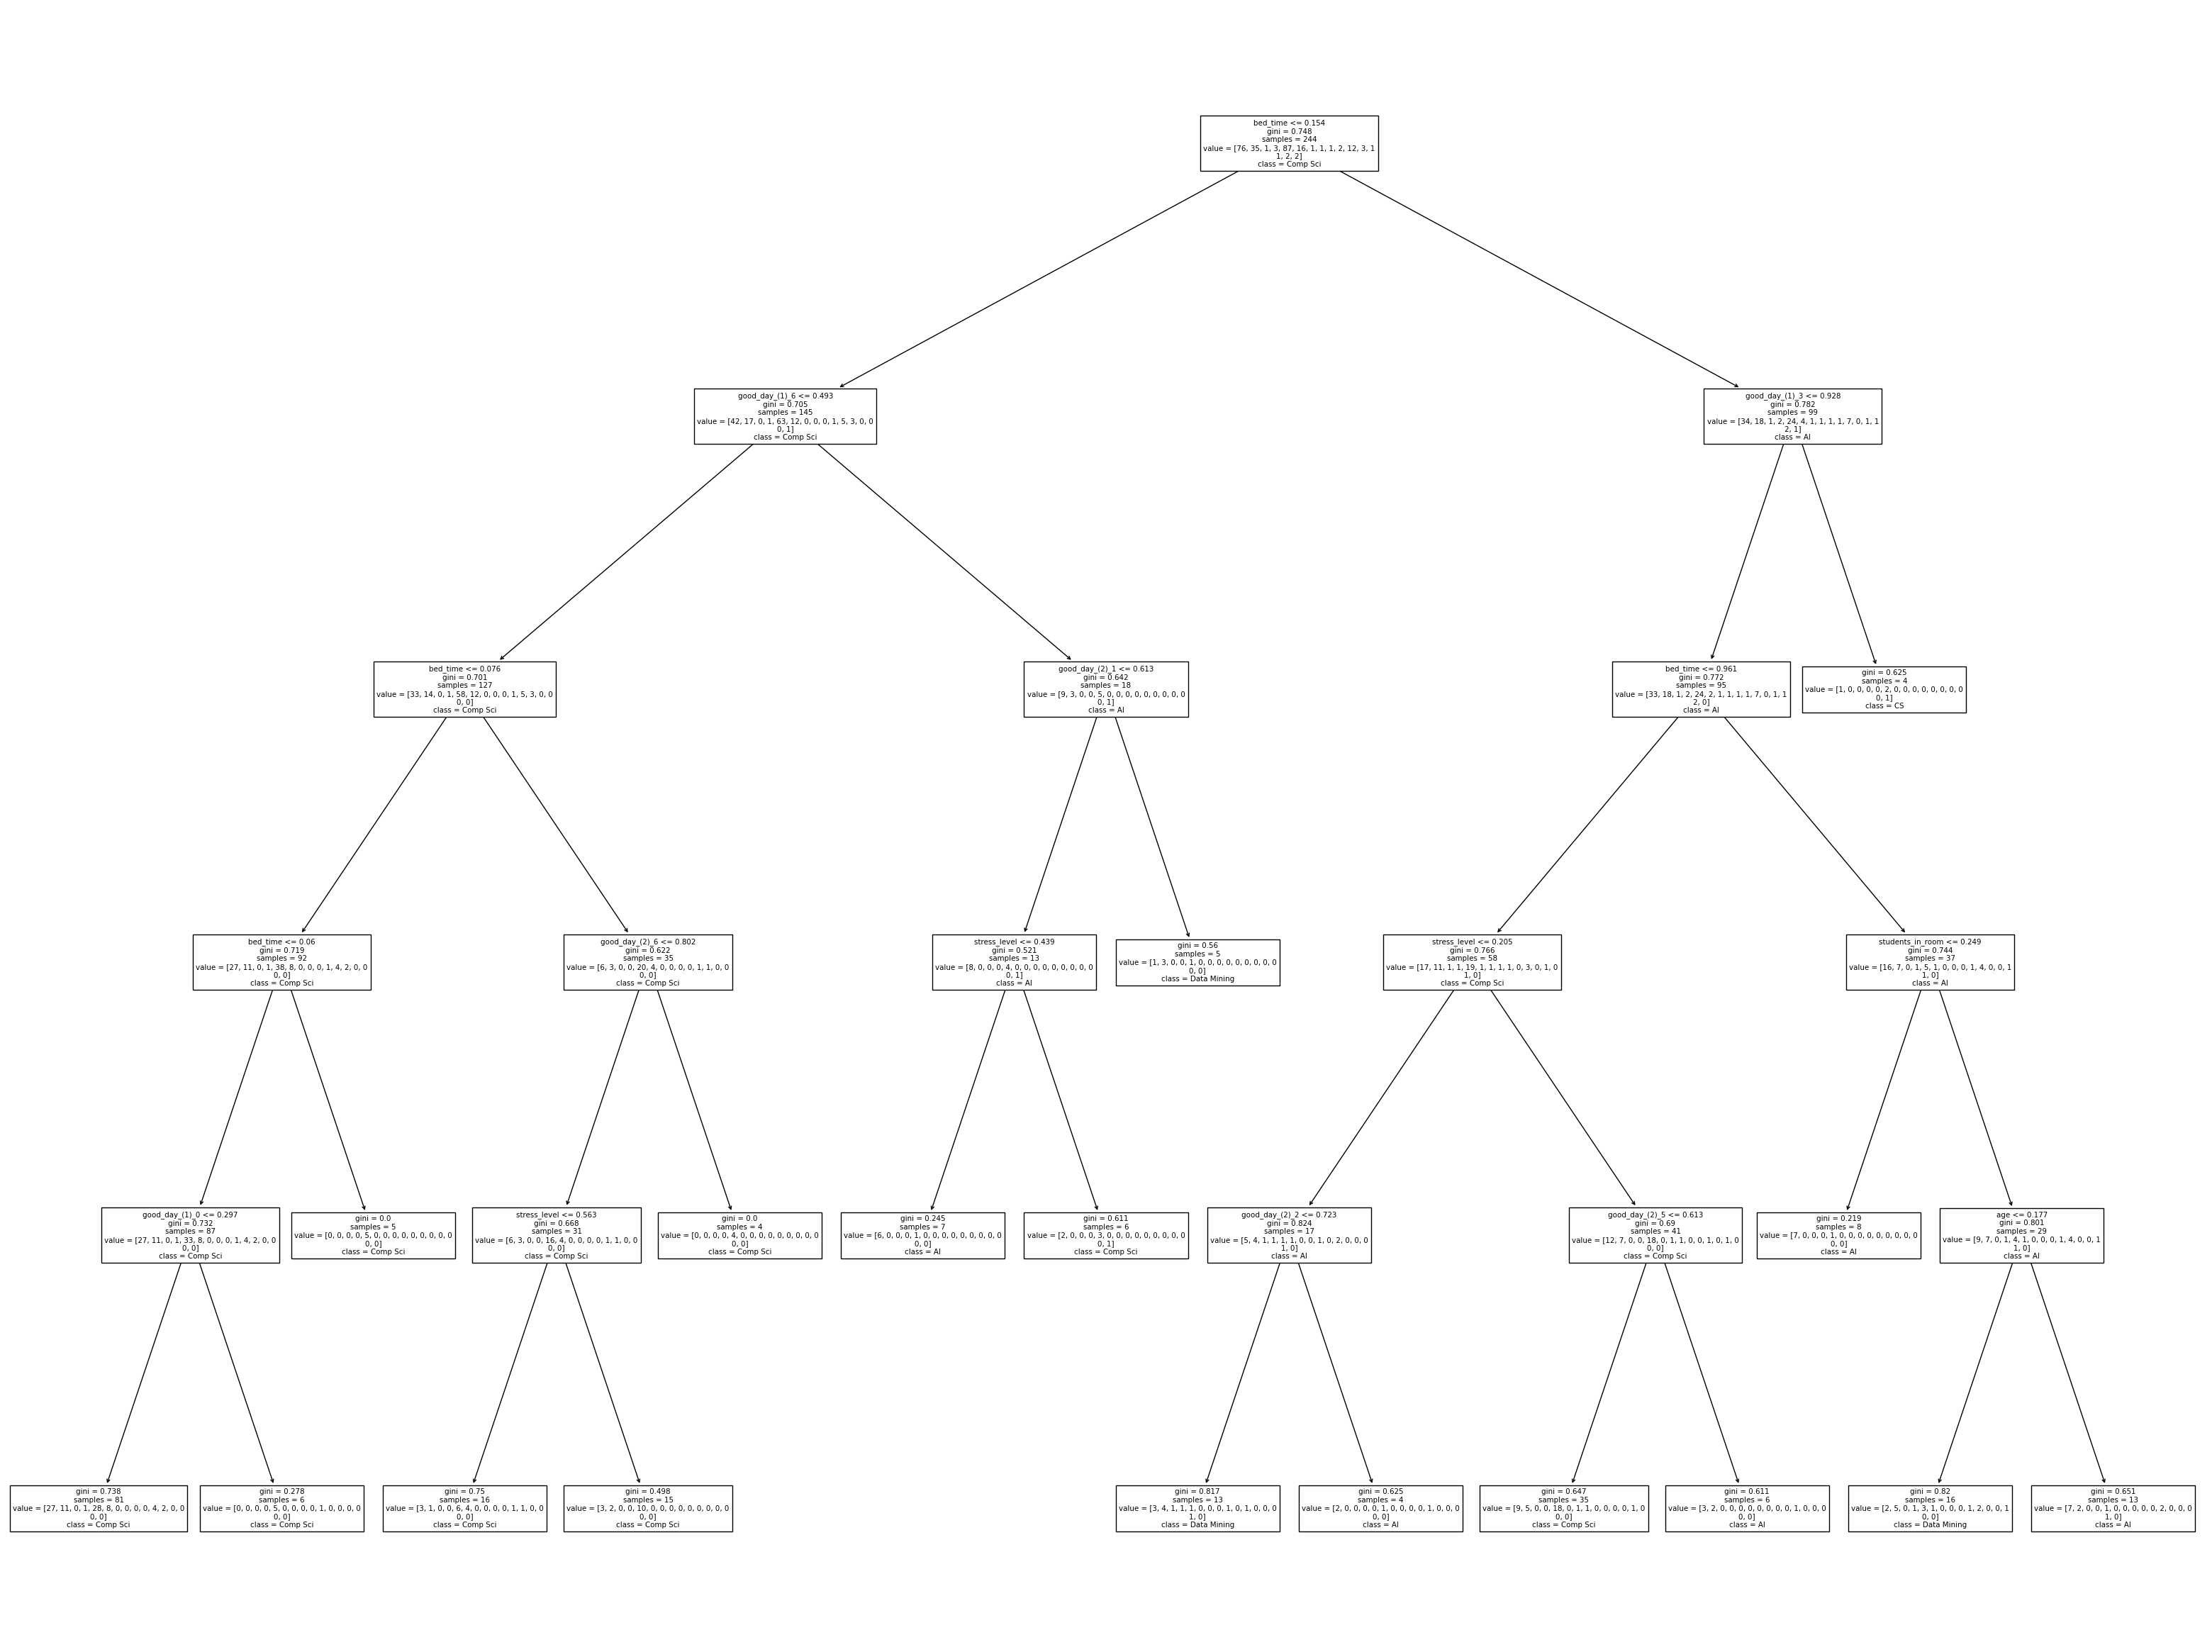

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 42, 'splitter': 'random'}
Accuracy score: 0.4017006802721088
Test set accuracy: 0.4098360655737705
Test set F1 score: 0.1118421052631579

Confidence Intervals:
Accuracy: [0.29508197 0.52459016]
F1 score: [0.07858002 0.2       ]


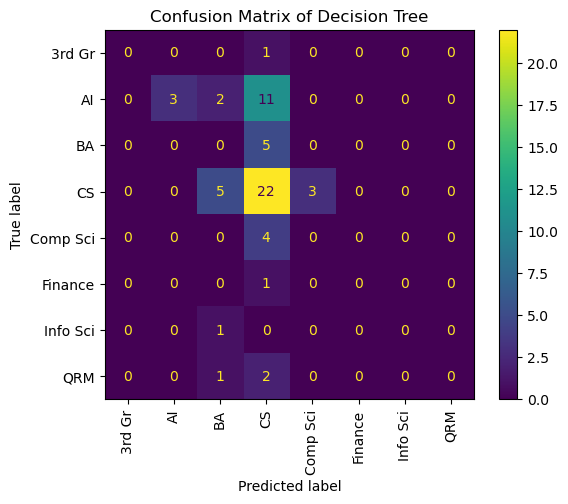

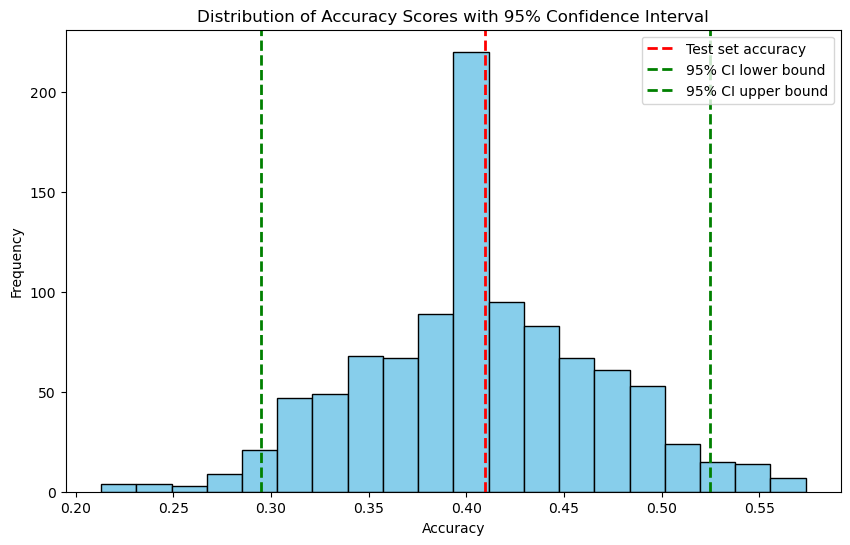

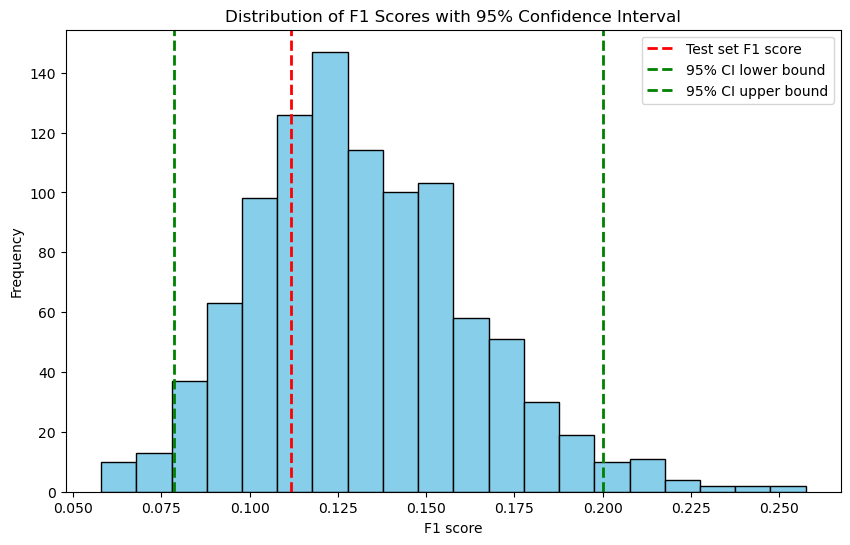

In [22]:
# Load the dataset
data = pd.read_csv('classification_dataset.csv')

# Check for missing values
data = data.dropna()

# Separate target variable and feature variables
target = data['programme']
data = data.drop(['programme','Unnamed: 0'], axis=1)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5),
    'random_state': [42],
}

# Create a Decision Tree model
decision_tree = DecisionTreeClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Get the best estimator from the GridSearchCV object
best_model = grid_search.best_estimator_

# Plot the decision tree
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(best_model, 
                   feature_names=data.columns,  
                   class_names=target.unique())
plt.show()

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of Decision Tree")

# Calculate confidence intervals for accuracy and F1 score

# Accuracy
n_test = len(y_test)
accuracy_scores = []
for _ in range(1000):  # repeat 1000 times to get a distribution of accuracy scores
    indices = np.random.randint(0, len(y_test), n_test)
    y_pred = grid_search.predict(X_test.iloc[indices])
    accuracy_scores.append(accuracy_score(y_test.iloc[indices], y_pred))


accuracy_scores = np.array(accuracy_scores)
confidence_interval_acc = np.percentile(accuracy_scores, q=[2.5, 97.5]) # 95% confidence interval

# F1 score
f1_scores = []
for _ in range(1000): # repeat 1000 times to get a distribution of F1 scores
    indices = np.random.randint(0, len(y_test), n_test)
    y_pred = grid_search.predict(X_test.iloc[indices])
    f1_scores.append(f1_score(y_test.iloc[indices], y_pred, average='macro'))

f1_scores = np.array(f1_scores)
confidence_interval_f1 = np.percentile(f1_scores, q=[2.5, 97.5]) # 95% confidence interval

print("\nConfidence Intervals:")
print("Accuracy:", confidence_interval_acc)
print("F1 score:", confidence_interval_f1)

# Plot the distribution of accuracy scores
plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=accuracy, color='red', linestyle='dashed', linewidth=2, label='Test set accuracy')
plt.axvline(x=confidence_interval_acc[0], color='green', linestyle='dashed', linewidth=2, label='95% CI lower bound')
plt.axvline(x=confidence_interval_acc[1], color='green', linestyle='dashed', linewidth=2, label='95% CI upper bound')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores with 95% Confidence Interval')
plt.legend()
plt.show()

# Plot the distribution of F1 scores
plt.figure(figsize=(10, 6))
plt.hist(f1_scores, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=f1, color='red', linestyle='dashed', linewidth=2, label='Test set F1 score')
plt.axvline(x=confidence_interval_f1[0], color='green', linestyle='dashed', linewidth=2, label='95% CI lower bound')
plt.axvline(x=confidence_interval_f1[1], color='green', linestyle='dashed', linewidth=2, label='95% CI upper bound')
plt.xlabel('F1 score')
plt.ylabel('Frequency')
plt.title('Distribution of F1 Scores with 95% Confidence Interval')
plt.legend()
plt.show()

